In [260]:
import numpy as np
from PIL import Image, ImageDraw

ZAD 1
Napisz funkcje rysuj_ramki_szare(w,h,grub, ?) oraz  rysuj_pasy_pionowe_szare(w,h,grub. ?) 
analogiczne do rysuj_ramki(w,h,grub) oraz rysuj_pasy_pionowe(w,h,grub) w wyniku których 
otrzymasz obraz w trybie L  taki, że zamiast czarnego i białego koloru pojawiają się odcienie 
szarości (według własnego uznania, ale według ustalonej reguły, którą trzeba będzie opisać). 
Zastosuj te funkcje a otrzymane obrazy (przyjmij w = 300, h=200, grub = 5) wklej do raportu.  
Zapisz obrazy w formacie png i wstaw na Moodle.

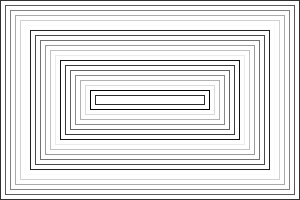

In [261]:
def rysuj_ramki_szare(w, h, grub):
    obraz = Image.new('L', (w, h), 255)
    rysunek = ImageDraw.Draw(obraz)
    
    odcien = 50
    for i in range(0, min(w, h)//2, grub):
        rysunek.rectangle([i, i, w-i-1, h-i-1], outline=odcien)
        odcien = (odcien + 40) % 256 
    
    return obraz

def rysuj_pasy_pionowe_szare(w, h, grub):
    obraz = Image.new('L', (w, h), 255)
    rysunek = ImageDraw.Draw(obraz)
    
    odcien = 50
    for i in range(0, w, grub):
        rysunek.rectangle([i, 0, i + grub - 1, h], fill=odcien)
        odcien = (odcien + 40) % 256
    
    return obraz

w, h, grub = 300, 200, 5
ramki_szare = rysuj_ramki_szare(w, h, grub)
pasy_szare = rysuj_pasy_pionowe_szare(w, h, grub)


ramki_szare.save('ramki_szare.png')
pasy_szare.save('pasy_szare.png')

ramki_szare


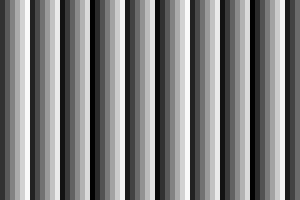

In [262]:
pasy_szare

ZAD 2
Należy stworzyć funkcję negatyw, która przekształca obrazy w trybach 1, L, oraz RGB na ich negatywy.

In [263]:

def negatyw(obraz):
    if obraz.mode == '1':
        obraz = obraz.convert('L')
        negatyw = Image.eval(obraz, lambda x: 255 - x).convert('1')

    elif obraz.mode == 'L':
        negatyw = Image.eval(obraz, lambda x: 255 - x)

    elif obraz.mode == 'RGB':
        r, g, b = obraz.split()

        r = Image.eval(r, lambda x: 255 - x)
        g = Image.eval(g, lambda x: 255 - x)
        b = Image.eval(b, lambda x: 255 - x)

        negatyw = Image.merge('RGB', (r, g, b))

    else:
        print("Nieobsługiwany tryb obrazu w programie.")

    return negatyw


def rysuj_ramki_kolorowe(w, kolory, a, b, c):
    obraz = Image.new('RGB', (w, w), (255, 255, 255))
    rysunek = ImageDraw.Draw(obraz)
    step = w // (2 * max(a, b, -c))
    for i in range(0, w//2, step):
        rysunek.rectangle([i, i, w-i-1, w-i-1], outline=kolory[i % len(kolory)])
    return obraz


def rysuj_po_skosie_szare(h,w, a, b):
    t = (h, w)
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return Image.fromarray(tab)

In [264]:

a = len("Konrad")  # 6
b = len("Markowski")  # 9
c = -a # -6

gwiazdka = Image.open('gwiazdka.bmp')
gwiazdka_negatyw = negatyw(gwiazdka)
gwiazdka_negatyw.save('gwiazdka_negatyw.png')

kolor=[(200,120,220)]
ramki_kolorowe = rysuj_ramki_kolorowe(200, kolor, a, b, c)
ramki_kolorowe.save('ramki_kolorowe.png')
ramki_kolorowe_negatyw = negatyw(ramki_kolorowe)
ramki_kolorowe_negatyw.save('ramki_kolorowe_negatyw.png')


po_skosie = rysuj_po_skosie_szare(100, 300, a, b)
po_skosie.save('po_skosie_szare.png')
po_skosie_negatyw = negatyw(po_skosie)
po_skosie_negatyw.save('po_skosie_negatyw.png')


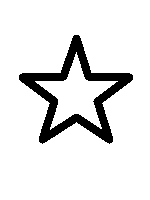

In [265]:
gwiazdka

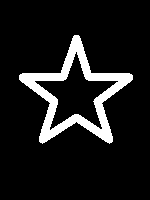

In [266]:
gwiazdka_negatyw

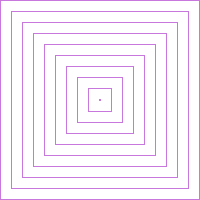

In [267]:
ramki_kolorowe

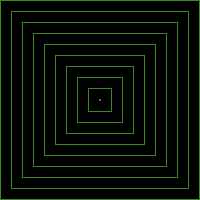

In [268]:
ramki_kolorowe_negatyw

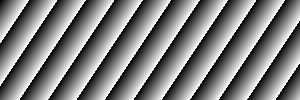

In [269]:
po_skosie

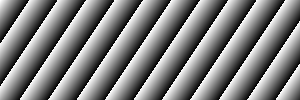

In [270]:
po_skosie_negatyw

ZAD 3
Napisz funkcję koloruj_w_paski(obraz, grub, ?) , która dla danego obrazu w trybie ‘1’  (np. czarne 
kształty na białym tle) tworzy obraz w trybie ‘RGB’, w którym tło jest białe a kształty są 
pokolorowane w kolorowe poziome paski grubości grub.  Sposób kolorowania (zmianę koloru) 
proszę wcześniej opisać i ewentualnie uwzględnić w argumentach funkcji. 

a) Wykonaj funkcję koloruj_w_paski(obraz, grub, ?) , gdzie obraz to czarno-biały obraz z 
inicjałami własnymi z lab1. Następnie zapisz w formacie jpg oraz png. Czy otrzymane 
obrazy są takie same? Dlaczego tak się dzieje? 
Otrzymany obraz wklej do raportu. W raporcie uzasadnij odpowiedź. Zapisane obrazy wstaw na 
Moodle

In [271]:
def koloruj_w_paski(obraz, grub):
    obraz_rgb = Image.new('RGB', obraz.size, (255, 255, 255))
    piksele = obraz.load()
    rgb_piksele = obraz_rgb.load()

    kolory = [(255, 0, 0), (0, 255, 0), (0, 0, 255)] #kolory odpowiadające RGB
    index = 0

    for y in range(obraz.height):
        if y % grub == 0:
            index = (index + 1) % len(kolory)
        for x in range(obraz.width):
            if piksele[x, y] == 0:
                rgb_piksele[x, y] = kolory[index]

    return obraz_rgb

In [272]:
inicjaly = Image.open('inicjaly.bmp').convert('1')
inicjaly_paski = koloruj_w_paski(inicjaly, 10)
inicjaly_paski.save('inicjaly_paski.jpg')
inicjaly_paski.save('inicjaly_paski.png')

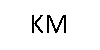

In [273]:
inicjaly

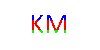

In [274]:
inicjaly_paski

PNG jest lepszym formatem do przechowywania obrazów z dużą ilością szczegółów, takich jak rysunki, grafiki komputerowe, oraz zdjęcia z wyraźnymi krawędziami. Zachowuje wszystkie detale, co sprawia, że obrazy są wyraźniejsze i bardziej wyraziste.

JPEG, ze względu na stratną kompresję, może powodować „artefakty” w obrazie, takie jak rozmycia, bloki kolorów i niepożądane efekty w obszarach z dużą ilością detali, co prowadzi do utraty ostrości i jakości obrazu.

Właśnie stąd widoczne są różnice między dwoma otrzymanymi obrazami.

ZAD 4
uint8 może przechowywać liczby w przedziale 0 do 255.
Liczby spoza tego zakresu są dostosowywane do tego przedziału liczbowego poprzez działanie modulo w przypadku liczb dodatnich poza zakresem i działanie dodawania gdy liczba jest ujemna.

Przechowywanie wartości przekraczających 255:
Wartość jest obliczana jako wartość % 256. Przykładowo, dla wartości 328:
328 mod 256 = 72

W związku z tym, wartość 328 w typie uint8 będzie przechowywana jako 72.

Przechowywanie wartości ujemnych:
Jeśli wartość jest ujemna, również następuje "owijanie", ale zgodnie z zasadami arytmetyki modulo. Wartości są dodawane do 256, aby uzyskać wartość w przedziale 0 do 255.
Dla wartości -24:
−24+256=232

W związku z tym, wartość -24 w typie uint8 będzie przechowywana jako 232.